In [3]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,random_state=10,noise=60)

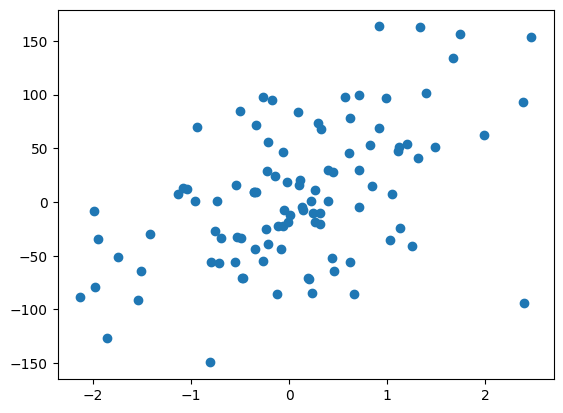

In [5]:
plt.scatter(x,y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(x,y)

LinearRegression()

In [9]:
lr.intercept_,lr.coef_

(3.1682490652549156, array([34.08884403]))

In [10]:
class GD():
    def __init__(self,lr,epoch):
        self.m = 34.08
        self.b = 50 #assume
        self.lr= lr
        self.epoch = epoch
    
    def fit(self,x,y):
        for i in range(self.epoch):
            loss_slope = -2 * np.sum(y-self.m*x.ravel() -self.b)
            self.b = self.b - self.lr * loss_slope    
        return self.m,self.b
    
    def predict(self,x):
        return (self.m *x +self.b)

In [11]:
lr1 = GD(0.00_001,10_000)

In [12]:
lr1.fit(x,y)

(34.08, 3.168951523342824)

In [13]:
y_pred= lr1.predict(x)

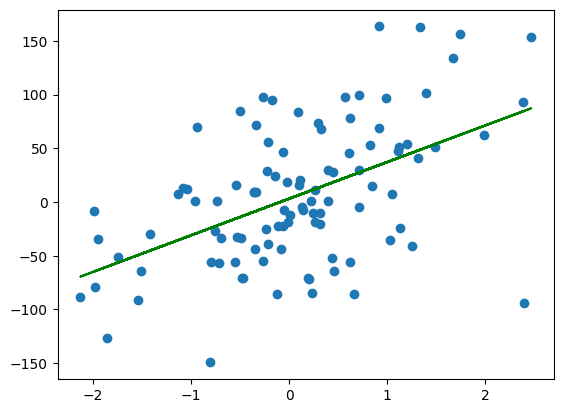

In [14]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='green')


In [21]:
class GD2():
    def __init__(self, lr, epoch):
        self.m = 20
        self.b = 10  # assume
        self.lr = lr
        self.epoch = epoch
    
    def fit(self, x, y):
        for i in range(self.epoch):
            loss_slope_m = -2 * np.sum((y - self.m * x.ravel() - self.b) * x.ravel())
            loss_slope_b = -2 * np.sum(y - self.m * x.ravel() - self.b)
            self.b = self.b - self.lr * loss_slope_b
            self.m = self.m - self.lr * loss_slope_m
        return self.m, self.b
    
    def predict(self, x):
        return self.m * x + self.b


In [22]:
lr2 = GD2(0.001,100000)

In [17]:
lr.coef_,lr.intercept_

(array([34.08884403]), 3.1682490652549156)

In [18]:
lr1.fit(x,y)

(34.08, 3.1689514287308143)

In [23]:
lr2.fit(x,y)

(34.088844031590014, 3.168249065254919)

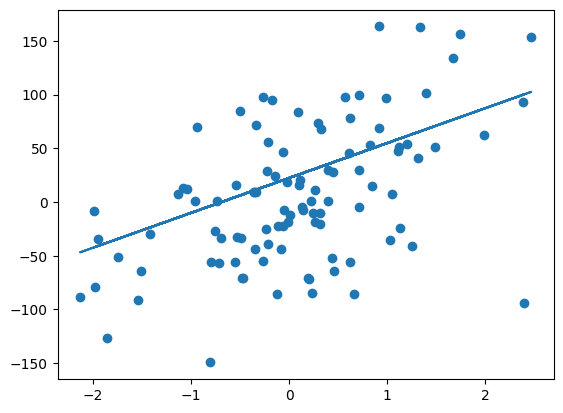

In [20]:
plt.plot(x,lr2.predict(x))
plt.scatter(x,y)